### Exercise 1
The attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. The actual gender and predicted gender of each customer is also provided. Please do not exclude $0 orders.

Assemble a dataframe with one row per customer and the following columns:
* customer_id 
* gender
* most_recent_order_date 
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [1]:
import pandas as pd

In [2]:
order = pd.read_csv('screening_exercise_orders_v201810.csv')

In [8]:
# add a 'order_count' column to the original dataset
# initiate it as 1 since originally each row represents 1 order
order['order_count'] = 1
# aggregate them together:
aggregation_functions = {'gender': 'first', 'date': 'last', 'order_count': 'sum'}
order_new = order.groupby(order['customer_id']).aggregate(aggregation_functions).reset_index()

In [9]:
# show the first 10 rows
order_new.head(10)

,customer_id,gender,date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### Exercise 2
Plot the count of orders per week for the store.

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# formatting the date
order['date'] = pd.to_datetime(order['date'])
# since 2017-01-01 is Sunday, lets suppose a week starts from Sunday for simplicity
order['week_number'] = order.date.dt.strftime('%U')
# group by week number and calculate the value
# ocw: orders count per week
ocw = order.groupby(['week_number'])['value'].count().astype('int')
ocw = pd.DataFrame(data = ocw).reset_index()
ocw.columns = ['week_number', 'orders_per_week']

In [12]:
# set figure size
plt.rcParams['figure.figsize'] = [15, 10]

In [14]:
# define my palette for bar plot
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

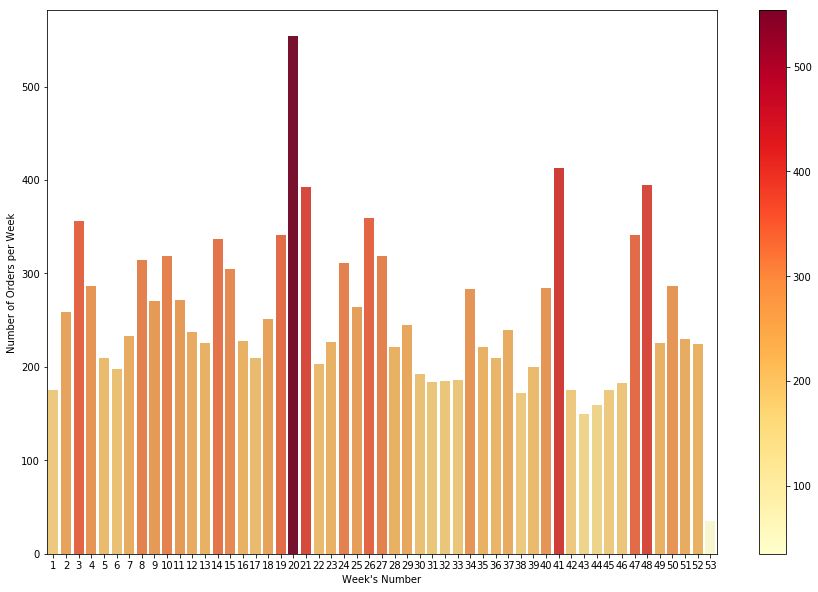

In [18]:
# plot the figure
# array for plotting the colorbar
norm = plt.Normalize(ocw['orders_per_week'].astype(int).min(), ocw['orders_per_week'].astype(int).max())
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
sm.set_array([])

# barplot the number of orders per week. the more orders, the "redder" the color
ax = sns.barplot(y = 'orders_per_week', x = 'week_number', data = ocw.astype(int), 
                 palette = colors_from_values(ocw['orders_per_week'].astype(int), "YlOrRd"))
ax.set(xlabel = "Week\'s Number", ylabel = "Number of Orders per Week")
ax.figure.colorbar(sm)

### Exercise 3
We have provided a sqlite3 database named `exercise.db`. The schema of the relevant table is written here: 

```CREATE TABLE items (sku INT PRIMARY KEY, name VARCHAR, price INT)```

Assume price is in cents. Connect to the database, then retrieve and print the name and SKU of each item in the table which has a price over $1.


In [19]:
import sqlite3

In [20]:
# connect to the database
con = sqlite3.connect('exercise.db')
# create a cursor
c = con.cursor()
# fetch all items with a price larger than 100 cents, and print the name and sku
c.execute('''select name, sku from items where price > 100''')
l = c.fetchall()
for row in l:
    print(row)

('apple', 1)
('cherry', 3)
('dates', 4)


### Exercise 4
There is one bug in the following pair of functions. Find the bug, write an assertion that fails because of the bug, and then modify the functions to fix the bug and make your assertion pass. This code also could use some refactoring. Modify it to make it as clear, concise, and simple as possible, while still working correctly. 


In [24]:
class ShoppingList:
    def __init__(self, store, items):
        self.store = store
        self.items = items

class Item:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        
def total_cost(shopping_lists):
    """Given a list of ShoppingList, returns the total cost of the shopping lists, 
    or None if the input list is empty"""
    if not shopping_lists:
        return None
    sum_so_far = 0
    for shopping_list in shopping_lists:
        sum_so_far += shopping_list_cost(shopping_list.items)
    return sum_so_far

def shopping_list_cost(shopping_list):
    """Given a list of Items, returns the total cost of that shopping list."""
    if not shopping_list:
        return None
    sum_so_far = 0
    for item in shopping_list:
        sum_so_far += item.price
    return sum_so_far

apple = Item("apple", 1.23)
almonds = Item("almonds", 7.99)
artichoke = Item("artichoke", 4.99)
shopping_list1 = ShoppingList("trader joe's", [apple, almonds])

assert shopping_list_cost([apple, almonds, artichoke]) == 1.23 + 7.99 + 4.99
assert total_cost([shopping_list1]) == 1.23 + 7.99

In [25]:
shopping_list1 = ShoppingList("trader joe's", [apple, almonds])
shopping_list2 = ShoppingList("Klaviyo", [])
assert total_cost([shopping_list1, shopping_list2]) == 1.23 + 7.99

TypeError: unsupported operand type(s) for +=: 'float' and 'NoneType'

The bug is caused by return None. Since we are calculating the price, we should return 0 if its an empty shopping list.

In [26]:
class ShoppingList:
    def __init__(self, store, items):
        self.store = store
        self.items = items

class Item:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        
def total_cost(shopping_lists):
    """Given a list of ShoppingList, returns the total cost of the shopping lists, 
    or None if the input list is empty"""
    if not shopping_lists:
        return 0
    sum_so_far = 0
    for shopping_list in shopping_lists:
        sum_so_far += shopping_list_cost(shopping_list.items)
    return sum_so_far

def shopping_list_cost(shopping_list):
    """Given a list of Items, returns the total cost of that shopping list."""
    if not shopping_list:
        return 0
    sum_so_far = 0
    for item in shopping_list:
        sum_so_far += item.price
    return sum_so_far

apple = Item("apple", 1.23)
almonds = Item("almonds", 7.99)
artichoke = Item("artichoke", 4.99)
shopping_list1 = ShoppingList("trader joe's", [apple, almonds])

assert shopping_list_cost([apple, almonds, artichoke]) == 1.23 + 7.99 + 4.99
assert total_cost([shopping_list1]) == 1.23 + 7.99

shopping_list2 = ShoppingList("Klaviyo", [])
assert total_cost([shopping_list1, shopping_list2]) == 1.23 + 7.99

### Exercise 5
Describe one of your favorite tools or techniques and give a small example of how it’s helped you solve a problem. Limit your answer to one paragraph, and please be specific.

One of my favorite tools is Google. We are in an age of big data and a search engine really helped me a lot. It can help me figure out lots of details of syntax. It can help me "remember" knowledge that barely used. But most important to me is that it can help me find tools that I need. I was working on the object detection project using deep learning. One crucial job was to annotate my images/data. Since I was new to deep learning several years ago, I had no idea how to annotate the data. Then I searched and amazingly found lots of solutions. In the end I chose LabelImg which was an open access tool on Github. It really helped me push foward my object detection project for early stage cancer detection.

*Markdown*

LaTex: $\LaTeX: \alpha^2$